In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import datetime

In [ ]:
df1 = pd.read_excel('/content/question1.xlsx')

In [ ]:
# Assuming you have a DataFrame named df1
types_to_exclude = ['#ElectricalVehicles', '#ElectricalCars']

# Use boolean indexing to exclude rows with specific types
df1 = df1[~df1['query'].isin(types_to_exclude)]

# Now filtered_df contains rows with 'query' values not in types_to_exclude
print(df1)

                            tweetDate  \
0      Fri Jul 28 10:36:34 +0000 2023   
1      Fri Jul 28 12:33:05 +0000 2023   
2      Mon Jul 31 07:37:34 +0000 2023   
3      Fri Jul 28 19:07:53 +0000 2023   
4      Sun Jul 23 11:18:10 +0000 2023   
...                               ...   
24660        2011-01-10T23:41:39.000Z   
24661        2012-10-23T15:46:36.000Z   
24662        2011-06-17T14:03:31.000Z   
24663        2023-08-13T22:04:00.000Z   
24664        2023-08-14T16:14:00.000Z   

                                                 content  \
0      The Electric Vehicle scam explained \n#Climate...   
1      This lady was a supporter of Green Energy unti...   
2      2018 vs 2023.\n\nSame temperatures, different ...   
3      "Climate Change" actor vs. actually caring for...   
4      Media temperatures ‚¨ú versus actual temperatu...   
...                                                  ...   
24660  I work in #EnergyEfficiency & #CarbonOffset in...   
24661  Passionn√© par les √

In [ ]:
# Assuming df is your DataFrame
columns_to_check_duplicates = ['content']
df1.drop_duplicates(subset=columns_to_check_duplicates, inplace=True)
df1.drop_duplicates(inplace=True)

In [ ]:
df1.shape

(24665, 7)

In [ ]:
def format_tweet_date(timestamp_str):
    try:
        # Try parsing the first date format
        timestamp = datetime.datetime.strptime(timestamp_str, "%a %b %d %H:%M:%S %z %Y")
    except ValueError:
        try:
            # If the first format fails, try parsing the second date format
            timestamp = datetime.datetime.strptime(timestamp_str, "%Y-%m-%dT%H:%M:%S.%fZ")
        except ValueError:
            # If both formats fail, return the original string (or handle as needed)
            return timestamp_str

    formatted_date = timestamp.strftime("%d %b %Y")
    return formatted_date

# Apply the function to the 'tweetDate' column
df1['tweetDate'] = df1['tweetDate'].apply(format_tweet_date)

In [ ]:
#CHANGE THE DATA TYPES
data_types = {
    'tweetDate': 'datetime64',
    'content': 'string',
    'twitterProfile': 'string',
    'tweetUrl': 'string',
    'timestamp': 'datetime64',
    'query': 'string',
    #'label' : 'string'
}

# Convert columns to their respective data types
for col, dtype in data_types.items():
    df1[col] = df1[col].astype(dtype)

# Print the updated dataframe with the correct data types
print(df1.dtypes)

tweetDate         datetime64[ns]
content                   string
twitterProfile            string
tweetUrl                  string
timestamp         datetime64[ns]
query                     string
label                     object
dtype: object


In [ ]:
df1.dropna(subset=['content'], inplace=True)

In [ ]:
#adding the length of the content
df1['length'] = df1['content'].str.len()
# Assuming df is your DataFrame
columns_to_drop = ['tweetUrl']
df1 = df1.drop(columns=columns_to_drop)
columns_to_check_duplicates = ['content']

df1.drop_duplicates(subset=columns_to_check_duplicates, inplace=True)
df1.drop_duplicates(inplace=True)

#creating a day,month, year columns
df1['day']=df1['tweetDate'].dt.day
df1['month']=df1['tweetDate'].dt.month
df1['year']=df1['tweetDate'].dt.year

df1.rename(columns={'twitterProfile': 'Username', 'content': 'Content'}, inplace=True)
df1.sample(2)

print(df1)

       tweetDate                                            Content  \
0     2023-07-28  The Electric Vehicle scam explained 
#ClimateS...   
1     2023-07-28  This lady was a supporter of Green Energy unti...   
2     2023-07-31  2018 vs 2023.

Same temperatures, different co...   
3     2023-07-28  "Climate Change" actor vs. actually caring for...   
4     2023-07-23  Media temperatures ‚¨ú versus actual temperatu...   
...          ...                                                ...   
24660 2011-01-10  I work in #EnergyEfficiency & #CarbonOffset in...   
24661 2012-10-23  Passionn√© par les √©nergies #efficacit√©√©ner...   
24662 2011-06-17  Our mission is to help you find the resources ...   
24663 2023-08-13  Our #presale continues 
Buy Basalt now and be ...   
24664 2023-08-14  In this Learning with Lowell episode, Wyss Sen...   

                               Username               timestamp  \
0       https://twitter.com/Kohima_Sean 2023-08-01 13:51:55.401   
1           h

In [ ]:
#Username Cleaning
def clean_username(username):
    if username.startswith('@'):
        return username[1:]  # Remove "@" symbol
    elif username.startswith('https://twitter.com/'):
        return username.split('/')[-1]  # Extract last part of URL
    else:
        return username

# Apply the clean_username function to the 'username' column
df1['Username'] = df1['Username'].apply(clean_username)

In [ ]:
# Assuming df is your DataFrame
columns_to_drop = ['timestamp']
df1 = df1.drop(columns=columns_to_drop)

# Print the updated DataFrame
df1.sample(3)

KeyError: ignored

In [ ]:
df1['query'] = df1['query'].str.lower()

In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
length,24664.0,178.372648,82.592841,1.0,117.0,167.0,257.0,984.0
day,24664.0,12.246716,8.341857,1.0,7.0,9.0,17.0,31.0
month,24664.0,7.397624,1.800556,1.0,7.0,8.0,8.0,12.0
year,24664.0,2021.156625,3.975597,2007.0,2023.0,2023.0,2023.0,2023.0


In [ ]:
df1.shape

(24664, 9)

In [ ]:
df1.columns

Index(['tweetDate', 'Content', 'Username', 'query', 'label', 'length', 'day',
       'month', 'year'],
      dtype='object')

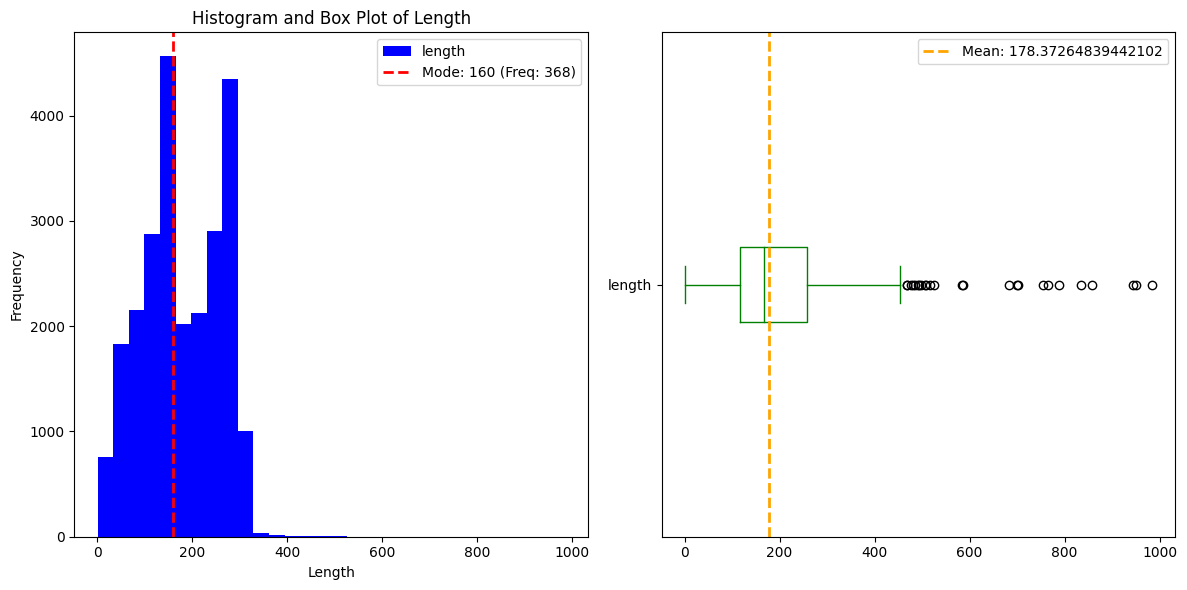

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# Add the histogram subplot
plt.subplot(1, 2, 1)
df1['length'].plot(kind='hist', bins=30, color='blue')
plt.title('Histogram and Box Plot of Length')
plt.xlabel('Length')
plt.ylabel('Frequency')

# Calculate the mode and its frequency
mode_length = df1['length'].mode().values[0]
mode_frequency = df1['length'].value_counts().max()

# Add a vertical line at the mode with a label
plt.axvline(mode_length, color='red', linestyle='dashed', linewidth=2, label=f'Mode: {mode_length} (Freq: {mode_frequency})')
plt.legend()

# Add the box plot subplot
plt.subplot(1, 2, 2)
df1['length'].plot(kind='box', vert=False, color='green')

# Calculate the mean of the 'length' column
mean_length = df1['length'].mean()

# Add a horizontal line at the mean on the box plot
plt.axvline(mean_length, color='orange', linestyle='dashed', linewidth=2, label=f'Mean: {mean_length}')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()


In [ ]:
#THE MOST TWEETED PROFILES
tweet_counts=df1['Username'].value_counts().head(10)
print(tweet_counts)

TonyClimate        622
ClimatChristo      381
PCarterClimate     123
bullshitjobs       121
_ClimateCraze       85
KeillerDon          79
wideawake_media     69
ScienceNotDogma     65
ScienceTimesCom     63
rateitgreen         59
Name: Username, dtype: int64


In [ ]:
username_counts = df1['Username'].value_counts().reset_index()

# Rename the columns
username_counts.columns = ['Username', 'Count']

# Display the new DataFrame
username_counts.head(10)

,Username,Count
0,TonyClimate,622
1,ClimatChristo,381
2,PCarterClimate,123
3,bullshitjobs,121
4,_ClimateCraze,85
5,KeillerDon,79
6,wideawake_media,69
7,ScienceNotDogma,65
8,ScienceTimesCom,63
9,rateitgreen,59


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_7, *['Count'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_8, *['Count'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_9, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_10, *['Count'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_11, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_12, *['Count'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_13, *[[['index', 'Count']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_14, *['index', 'Count', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_15, *['index', 'count()', None], **{})
chart

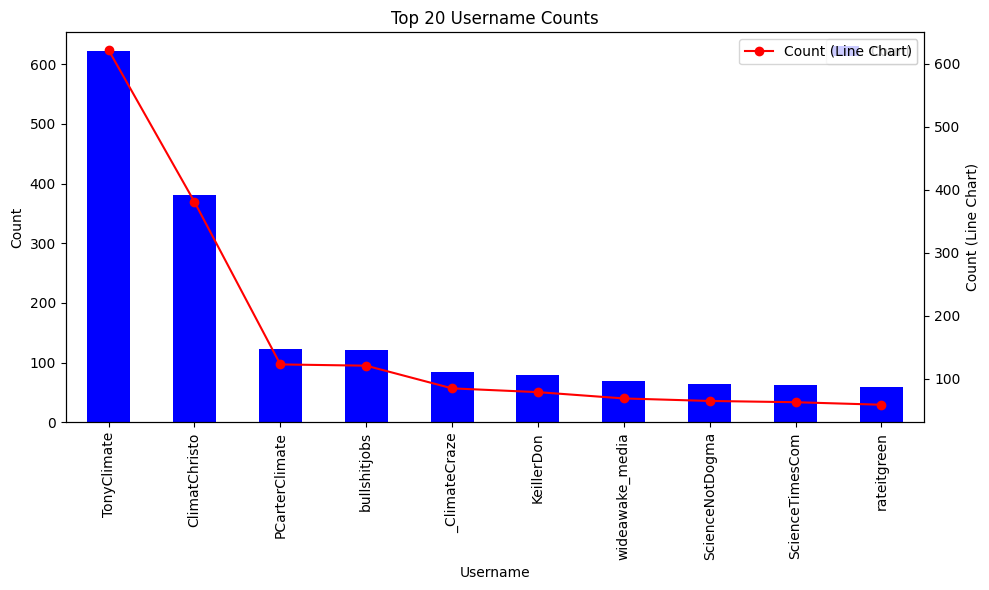

In [ ]:
top_20_username_counts = username_counts.sort_values(by='Count', ascending=False).head(10)

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart
top_20_username_counts.plot(kind='bar', x='Username', y='Count', color='blue', ax=ax1)

# Set labels and title for the bar chart
ax1.set_xlabel('Username')
ax1.set_ylabel('Count')
ax1.set_title('Top 20 Username Counts')

# Create a twin axis for the line chart
ax2 = ax1.twinx()

# Plot the line chart for the counts
top_20_username_counts.plot(kind='line', x='Username', y='Count', color='red', ax=ax2, marker='o')

# Set labels and title for the line chart
ax2.set_ylabel('Count (Line Chart)')
ax2.legend(['Count (Line Chart)'], loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns

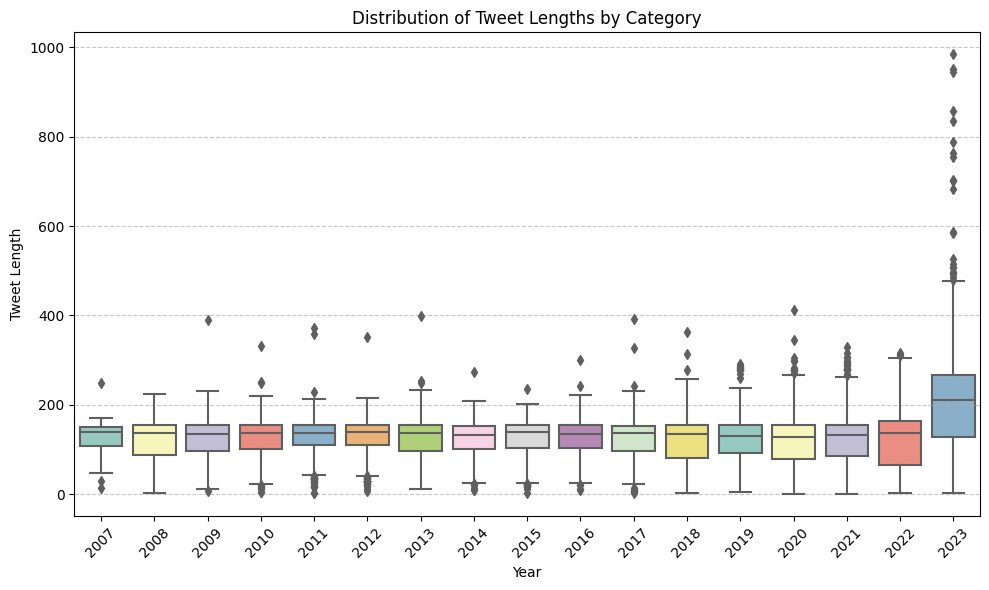

In [ ]:
# Create a box plot to show the distribution of tweet lengths by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='length', data=df1, palette='Set3')
plt.title('Distribution of Tweet Lengths by Category')
plt.xlabel('Year')
plt.ylabel('Tweet Length')
plt.xticks(rotation=45)  # Rotate category labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()



<ipython-input-33-5c305bb9cc5a>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='year', y='length', data=df1, palette='Set3', alpha=0.7)


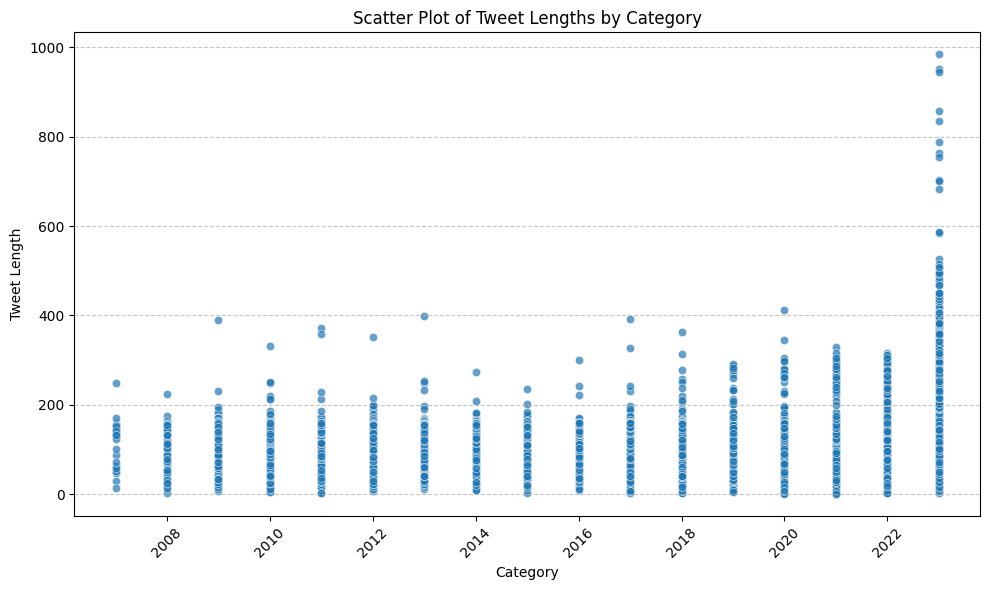

In [ ]:
# Create a scatter plot to show individual data points for tweet lengths by category
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='length', data=df1, palette='Set3', alpha=0.7)
plt.title('Scatter Plot of Tweet Lengths by Category')
plt.xlabel('Category')
plt.ylabel('Tweet Length')
plt.xticks(rotation=45)  # Rotate category labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
year_counts = df1['year'].value_counts().reset_index()

# Rename the columns
year_counts.columns = ['year', 'Count']

# Display the new DataFrame
year_counts

,year,Count
0,2023,18987
1,2009,560
2,2011,532
3,2019,510
4,2010,467
5,2020,455
6,2021,431
7,2012,395
8,2013,355
9,2022,341


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_16, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_17, *['year'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_18, *['Count'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_19, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_20, *['year'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_21, *['Count'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_22, *[[['index', 'year'], ['year', 'Count']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_23, *['index', 'Count', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_24, *['index', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_25, *['year', 'Count', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_26, *['year', 'count()', None], **{})
chart

<ipython-input-38-c77c1093a1fe>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  year_counts_without_2023 = year_counts2[year_counts['year'] != 2023]


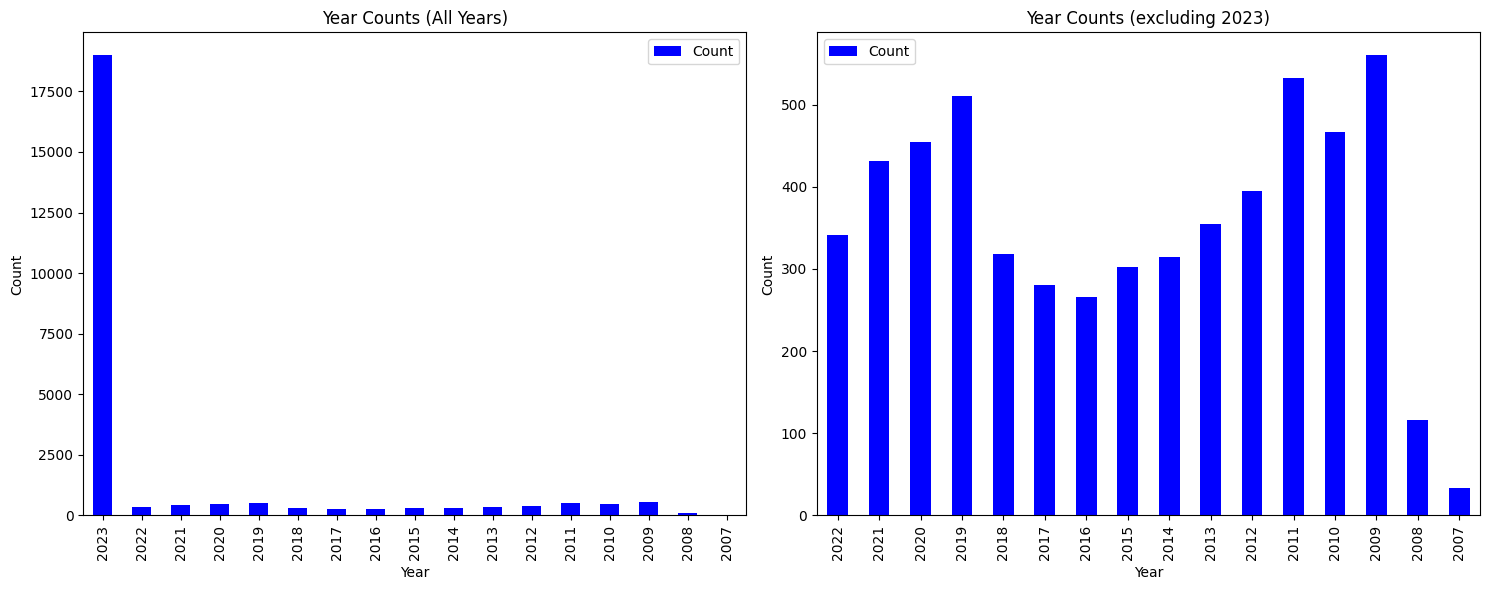

In [ ]:
year_counts2 = year_counts.sort_values(by='year', ascending=False)
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot the bar chart for all years on the first subplot
year_counts2.plot(kind='bar', x='year', y='Count', color='blue', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Count')
ax1.set_title('Year Counts (All Years)')

# Filter data to exclude year 2023 for the second subplot
year_counts_without_2023 = year_counts2[year_counts['year'] != 2023]

# Plot the bar chart excluding year 2023 on the second subplot
year_counts_without_2023.plot(kind='bar', x='year', y='Count', color='blue', ax=ax2)
ax2.set_xlabel('Year')
ax2.set_ylabel('Count')
ax2.set_title('Year Counts (excluding 2023)')

# Adjust layout for subplots
plt.tight_layout()

# Show the plots
plt.show()

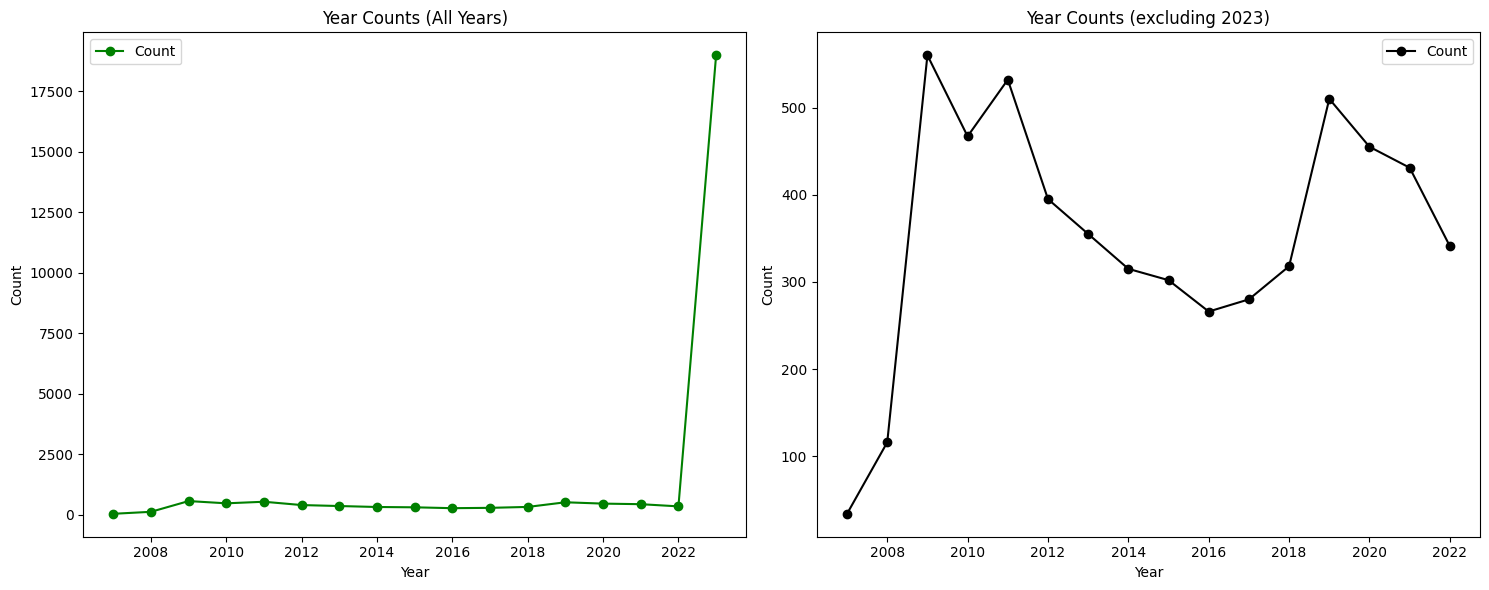

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot the line chart for all years on the first subplot
year_counts2.plot(kind='line', x='year', y='Count', color='green', marker='o', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Count')
ax1.set_title('Year Counts (All Years)')

# Plot the line chart excluding year 2023 on the second subplot
year_counts_without_2023.plot(kind='line', x='year', y='Count', color='black', marker='o', ax=ax2)
ax2.set_xlabel('Year')
ax2.set_ylabel('Count')
ax2.set_title('Year Counts (excluding 2023)')

# Adjust layout for subplots
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
df1.rename(columns={'Content': 'content'}, inplace=True)

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import html
import spacy
import unicodedata
# Download stopwords (if not already downloaded)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def clean(Content):
    # convert html escapes like &amp; to characters.
    Content = html.unescape(Content)
    # tags like <tab>
    Content = re.sub(r'<[^<>]*>', ' ', Content)
    # markdown URLs like [Some text](https://....)
    Content = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', Content)
    # text or code in brackets like [0]
    Content = re.sub(r'\[[^\[\]]*\]', ' ', Content)
    # standalone sequences of specials, matches &# but not #cool
    Content = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', Content)
    # standalone sequences of hyphens like --- or ==
    Content = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', Content)
    # sequences of white spaces
    Content = re.sub(r'\s+', ' ', Content)
    # Remove URLs using a pattern that matches http and https URLs
    Content = re.sub(r'https?://\S+|www\.\S+', '', Content)
    return Content.strip()

# Apply the clean function to the 'text' column
df1['cleaned_text'] = df1['content'].apply(clean)

In [ ]:
def clean(Content):
    # convert html escapes like &amp; to characters.
    Content = html.unescape(Content)
    # tags like <tab>
    Content = re.sub(r'<[^<>]*>', ' ', Content)
    # markdown URLs like [Some text](https://....)
    Content = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', Content)
    # text or code in brackets like [0]
    Content = re.sub(r'\[[^\[\]]*\]', ' ', Content)
    # standalone sequences of specials, matches &# but not #cool
    Content = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', Content)
    # standalone sequences of hyphens like --- or ==
    Content = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', Content)
    # sequences of white spaces
    Content = re.sub(r'\s+', ' ', Content)
    # Remove URLs using a pattern that matches http and https URLs
    Content = re.sub(r'https?://\S+|www\.\S+', '', Content)
    # Remove standalone single alphabetic characters
    Content = re.sub(r'\b[a-zA-Z]\b', ' ', Content)
    return Content.strip()


# Apply the clean function to the 'Content' column
df1['cleaned_text'] = df1['content'].apply(clean)

# Print the cleaned text
print(df1['cleaned_text'])

0         The Electric Vehicle scam explained #ClimateScam
1        This lady was   supporter of Green Energy unti...
2        2018 vs 2023. Same temperatures, different col...
3        "Climate Change" actor vs. actually caring for...
4        Media temperatures ‚¨ú versus actual temperatu...
                               ...                        
24660    work in #EnergyEfficiency #CarbonOffset in #Co...
24661    Passionn√© par les √©nergies #efficacit√©√©ner...
24662    Our mission is to help you find the resources ...
24663    Our #presale continues Buy Basalt now and be p...
24664    In this Learning with Lowell episode, Wyss Sen...
Name: cleaned_text, Length: 24664, dtype: object


In [ ]:
def clean(Content):
    # Convert html escapes like &amp; to characters.
    Content = html.unescape(Content)
    # Remove URLs using a pattern that matches http and https URLs
    Content = re.sub(r'https?://\S+|www\.\S+', '', Content)
    # Remove extra white spaces
    Content = re.sub(r'\s+', ' ', Content)
    return Content.strip()


# Apply the clean function to the 'Content' column
df1['cleaned_text'] = df1['cleaned_text'].apply(clean)

In [ ]:
!pip install textacy
import textacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.3/320.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.2 MB/s eta 0:00:00


In [ ]:
import textacy.preprocessing as tprep
def normalize(cleaned_text):
    cleaned_text = tprep.normalize_hyphenated_words(cleaned_text)
    cleaned_text = tprep.normalize_quotation_marks(cleaned_text)
    cleaned_text = tprep.normalize_unicode(cleaned_text)
    cleaned_text = tprep.remove_accents(cleaned_text)
    return cleaned_text

In [ ]:
#cleaning the @'s
def clean_text(cleaned_text):
    # Remove Twitter mentions (e.g., @Rainbow6es, @CreamRealBetis, @eMonkeyzClub)
    cleaned_text = re.sub(r'@\w+', '', cleaned_text)

    # Remove any leading or trailing spaces
    cleaned_text = cleaned_text.strip()

    return cleaned_text
df1['cleaned_text'] = df1['cleaned_text'].apply(clean_text)
print(df1['cleaned_text'])

0         The Electric Vehicle scam explained #ClimateScam
1        This lady was supporter of Green Energy until ...
2        2018 vs 2023. Same temperatures, different col...
3        "Climate Change" actor vs. actually caring for...
4        Media temperatures ‚¨ú versus actual temperatu...
                               ...                        
24660    work in #EnergyEfficiency #CarbonOffset in #Co...
24661    Passionn√© par les √©nergies #efficacit√©√©ner...
24662    Our mission is to help you find the resources ...
24663    Our #presale continues Buy Basalt now and be p...
24664    In this Learning with Lowell episode, Wyss Sen...
Name: cleaned_text, Length: 24664, dtype: object


In [ ]:
df1['cleaned_text'].iloc[24660]

'Passionn√© par les √©nergies #efficacit√©√©nerg√©tique #energyefficiency #soci√© √©'

In [ ]:
# Function to remove accents and special characters
def clean_text(text):
    cleaned_text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8')
    cleaned_text = ''.join(e for e in cleaned_text if e.isalnum() or e.isspace() or e == '#')
    cleaned_text = ' '.join(cleaned_text.split()).lower()
    return cleaned_text

# Clean the 'text_column' in the DataFrame
df1['cleaned_text'] = df1['cleaned_text'].apply(clean_text)

# Print the cleaned DataFrame
print(df1)

       tweetDate                                            content  \
0     2023-07-28  The Electric Vehicle scam explained 
#ClimateS...   
1     2023-07-28  This lady was a supporter of Green Energy unti...   
2     2023-07-31  2018 vs 2023.

Same temperatures, different co...   
3     2023-07-28  "Climate Change" actor vs. actually caring for...   
4     2023-07-23  Media temperatures ‚¨ú versus actual temperatu...   
...          ...                                                ...   
24660 2011-01-10  I work in #EnergyEfficiency & #CarbonOffset in...   
24661 2012-10-23  Passionn√© par les √©nergies #efficacit√©√©ner...   
24662 2011-06-17  Our mission is to help you find the resources ...   
24663 2023-08-13  Our #presale continues 
Buy Basalt now and be ...   
24664 2023-08-14  In this Learning with Lowell episode, Wyss Sen...   

              Username              query     label  length  day  month  year  \
0          Kohima_Sean       #climatescam  negative      73   28  